# Pré-processamento dos dados com Python

Para este hands on vamos usar o [Data Set do Titanic disponível no Kaggle](https://www.kaggle.com/c/titanic). Este é um conjunto de dados muito famoso. O dataset disponibiliza informações dos passageiros que nos permite aplicar algoritmos de aprendizagem supervisionada para prever se um passageiro sobrevivereu ou não.

Antes de aplicarmos algum classificador para este problema vamos realizar o pré-processamento dos dados.

Este dataset já está parcialmente pré-processado, mas se quiser usar o conjunto de dados original, hospedado diretamente no Kaggle, será um desafio interessante =D.

## O Dicionário de Dados

**Survival**: Sobrevivente (Não=0, Sim=1)

**Pclass**: Classe de ingresso (1=1st, 2=2nd, 3=3rd)

**Sex**: Sexo

**Age**: Idade em anos

**Sibsp**: Quantidade de irmãos e cônjuges a bordo do Titanic

**Parch**: Quantidade de pais e filhos  a bordo do Titanic

**Ticket**: Número do ticket

**Fare**: Tarifa do passageiro

**Cabin**: Número da cabine	

**Embarked**: Portão de Embarque (C=Cherbourg, Q=Queenstown, S=Southampton)



## Import as bibliotecas
Vamos importar algumas bibliotecas para começar!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # biblioteca de visualização utilizada pelo pandas e pelo seaborn
import seaborn as sns # biblioteca de visualização com mais opções de gráficos
%matplotlib inline # comando necessário para que as imagens sejam exibidas aqui mesmo no notebook

## 1. Acessando os dados

* Utilize a função **pd.read_csv** para ler o dado e salve na variável **train**
    - O nome do dataset é **titanic_train.csv**
    - Visualize alguns elementos do seu data set, para isto use **train.head()**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Engenharia de atributos


## Analise os atributos ausentes

* Podemos usar o seaborn para criar um mapa de calor simples, heatmap, para ver onde faltam dados!

* Calcule o percentual de valores faltantes para cada coluna
    - Devemos eliminar a coluna "Age"? Qual a melhor forma de realizar um input para os valores faltantes?
    - E quanto a coluna "Cabin", o que devemos fazer? Será que poderíamos inferir esse valor com base no preço do ingresso e/ou portão de entrada?

* Plot o percentual de valores faltantes para cada coluna

___

## Limpeza dos Dados

Queremos preencher os dados que faltam em algumas amostras para o atributo **Age** e também eliminar informações que não são úteis. Uma maneira de fazer isso é preencher com o valor da idade média de todos os passageiros. O que vocês acham? Há outra forma melhor de fazer? Vejam abaixo um exemplo de um box plot gráfico 

- Para visualizar detalhes de uma coluna você pode usar **dataframe['coluna'].describe()**
- Para recuperar a média você pode utilizar a função **mean** sobre a coluna
- Para preencher a coluna **Age** você pode criar uma função que retorne um valor, e posteriormente aplicar na coluna Age **df['column'] = df[['column']].apply(function, axis=1)**. 

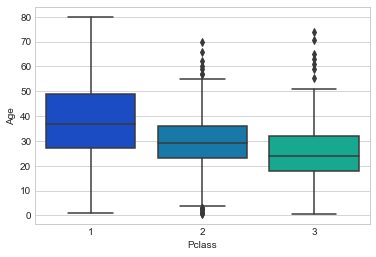

In [26]:
#plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

- Realize o input da coluna **Age**, considerando a média da idade.

- Realize o input da coluna **Age**, considerando a média da idade pelo **Pclass** e não a média geral da Idade.

- Crie um novo mapa de calor

* Elimine as colunas **Cabin, Name e Ticket** do DataSet. Por quê mesmo vamos eliminá-las?

* Construa um novo heatmap e verifique se há ainda algum valor nulo.

* Se houver, vamos eliminá-lo! Para fazer isto use **df.dropna(inplace=True)**. Antes disso verique quantos registros serão eliminados.

## Criação e/ou Transformação

Precisamos converter atributos categóricos em variáveis numéricas usando pandas, a função **get_dummies** aplica o labelEncoding e OneHotEncoding!
Caso contrário, nosso algoritmo de ML não será apto para trabalhar com recursos diretamente categóricos como entradas.

### Hands on

* Veja o exemplo abaixo:

In [67]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [70]:
train.drop(['Sex'],axis=1,inplace=True)

In [57]:
train = pd.concat([train,sex],axis=1)

* Refaça o mesmo processo de tratamento para **todos** os atributos categóricos (por exemplo, o atributo **Embarked**). Visualize como os seus dados estão ficando

* Remova as variáveis que passaram pelo processo de one hot encoding. Você pode usar a função info() para visualizar informações do seu dataFrame*

* O que o código acima fez? Por quê não foram adicionadas as colunas "Female" e "C"?

## Desafios =D

- Aplique normalização sobre as tarifas. Veja a [dica do Batman](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html)

- Crie uma feature categórica com base na idade da pessoa, (por exemplo, criança, jovem, adulto e criança), no lugar da idade.

- Que tal substituirmos o nome pelos pronomes de tratamento (e.g Miss., Mrs)

- Existe alguma informação que você pode substituir pelo ticket? Uma média de tarifa por exemplo, considerando a primeira letra do bilhete. Por quê realizar este tipo de tratamento?

- Talvez a cabine possa ser uma característica ... E se a cabine puder ser inferida? Tente descobrir como funcionava a divisão das cabines considerando os outros atributos, por exemplo classe e/ou idade

- Execute o mesmo o pipeline de transformações sobre o dataset de titanic_test.csv

Você pode querer explorar outras formas pré-processamento de dados ... fique a vontade =D!